In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("D:/UNIFIED/Supermart Grocery Sales-33/Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [7]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [9]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')


In [15]:
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [17]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12,6,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11,10,2016


In [19]:
df.drop('Order ID',axis=1,inplace=True)

In [21]:
df.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8,11,2017
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8,11,2017
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12,6,2017
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11,10,2016


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Customer Name'] = le.fit_transform(df['Customer Name'])

In [25]:

df['Category'] = le.fit_transform(df['Category'])


In [27]:

df['Sub Category'] = le.fit_transform(df['Sub Category'])


In [29]:

df['City'] = le.fit_transform(df['City'])


In [31]:

df['Region'] = le.fit_transform(df['Region'])



In [33]:

df['State'] = le.fit_transform(df['State'])


In [33]:
# df['Order Month'] = le.fit_transform(df['Order Month'])

In [35]:
df.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,12,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8,11,2017
1,37,1,13,8,2017-11-08,3,749,0.18,149.80,0,8,11,2017
2,14,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12,6,2017
3,15,4,12,4,2016-10-11,3,896,0.25,89.60,0,11,10,2016
4,28,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11,10,2016


In [37]:
df_encoded = pd.get_dummies(df, columns=["Customer Name", "Category", "Sub Category", "City", "Region", "State"], drop_first=True)
df_encoded

,Order Date,Sales,Discount,Profit,Order Day,Order Month,Order Year,Customer Name_1,Customer Name_2,Customer Name_3,...,City_18,City_19,City_20,City_21,City_22,City_23,Region_1,Region_2,Region_3,Region_4
0,2017-11-08,1254,0.12,401.28,8,11,2017,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,2017-11-08,749,0.18,149.80,8,11,2017,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2017-06-12,2360,0.21,165.20,12,6,2017,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2016-10-11,896,0.25,89.60,11,10,2016,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2016-10-11,2355,0.26,918.45,11,10,2016,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2015-12-24,945,0.16,359.10,24,12,2015,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9990,2015-07-12,1195,0.26,71.70,12,7,2015,False,False,True,...,False,False,False,False,False,False,False,False,False,True
9991,2017-06-06,1567,0.16,501.44,6,6,2017,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9992,2018-10-16,1659,0.15,597.24,16,10,2018,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [39]:
df_encoded["Order Date"] = pd.to_datetime(df_encoded["Order Date"])
df_encoded["Order Date"] = df_encoded["Order Date"].map(pd.Timestamp.toordinal)


In [41]:
df_encoded.head()

,Order Date,Sales,Discount,Profit,Order Day,Order Month,Order Year,Customer Name_1,Customer Name_2,Customer Name_3,...,City_18,City_19,City_20,City_21,City_22,City_23,Region_1,Region_2,Region_3,Region_4
0,736641,1254,0.12,401.28,8,11,2017,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,736641,749,0.18,149.80,8,11,2017,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,736492,2360,0.21,165.20,12,6,2017,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,736248,896,0.25,89.60,11,10,2016,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,736248,2355,0.26,918.45,11,10,2016,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

C:\Users\hp\AppData\Local\Temp\ipykernel_18908\51041509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')


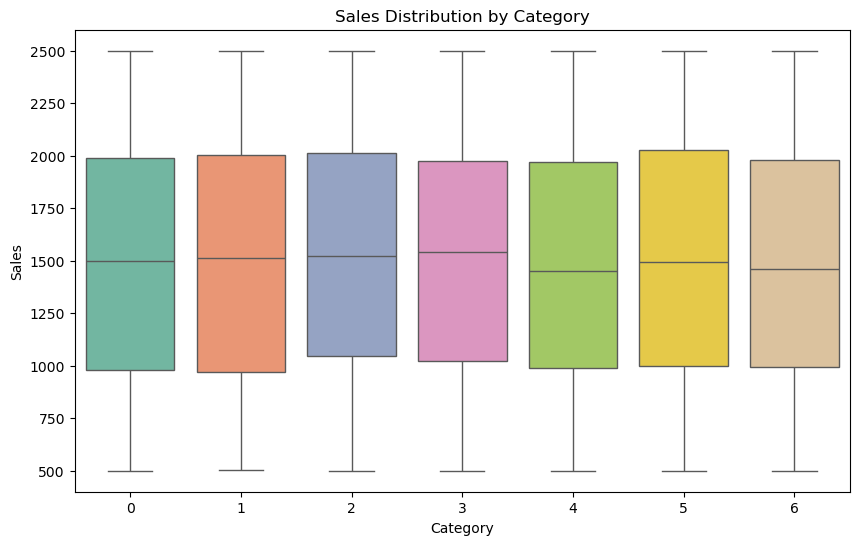

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

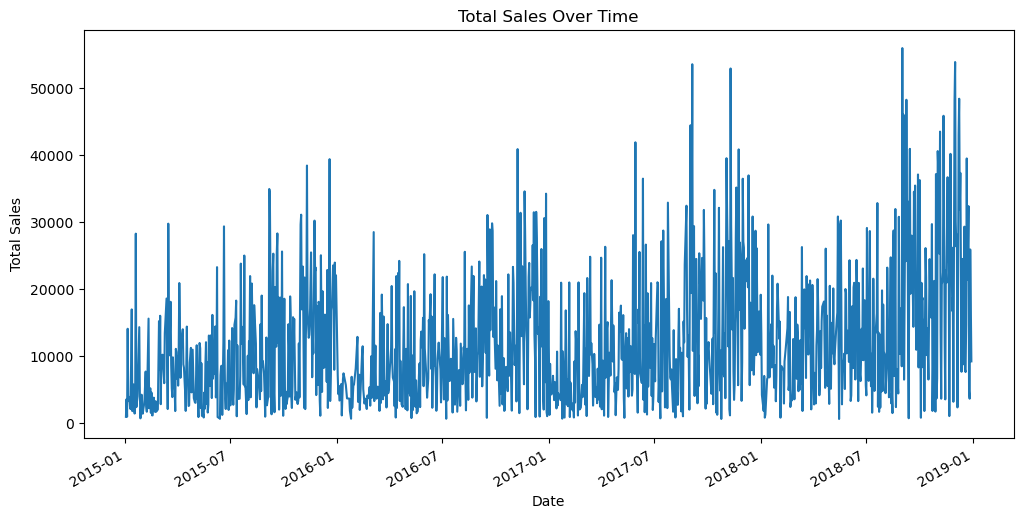

In [47]:
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

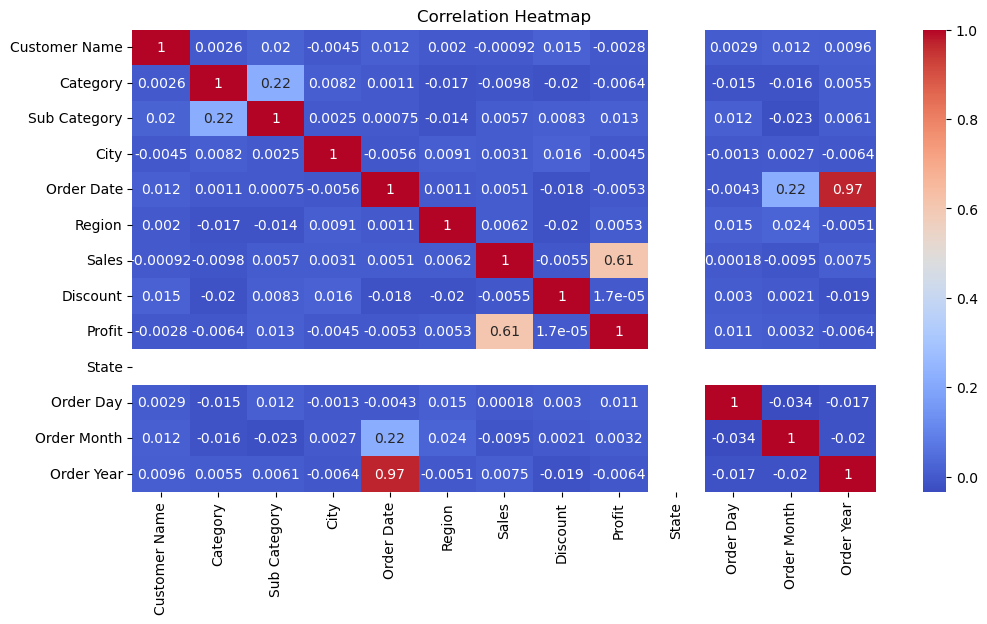

In [49]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
features = df.drop(columns=['Customer Name','Order Date', 'Sales', 'Order Month'])
target = df['Sales']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
ypred = model.predict(X_test)
ypred

array([1143.02371097, 1526.57180106, 1130.69113436, ..., 1712.37355609,
       1175.37767669, 1022.41706488])

In [61]:
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("mean squared error:",mse)
print("r2_score:",r2)


mean squared error: 213030.68736916437
r2_score: 0.35409350805366546


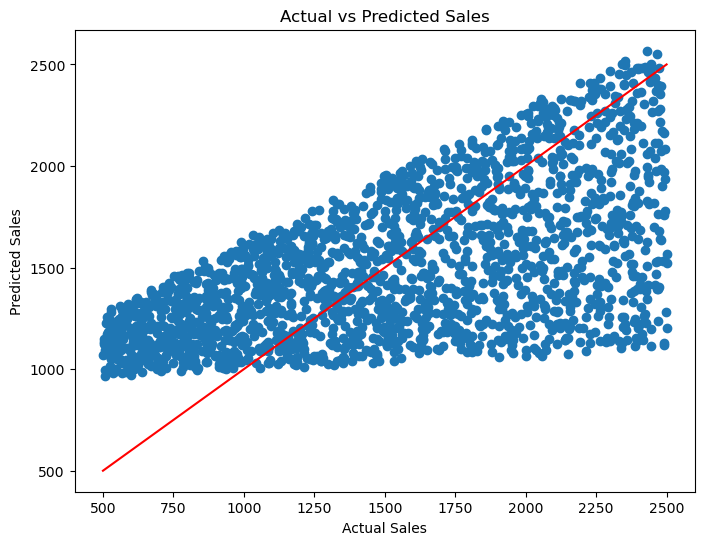

In [63]:
 # 1. Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()